<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F450%2F1*CXZ804tKLPy2hiikJbYH3w.png&f=1&nofb=1" width=30% ></center>

 # <center> Assignment 4: Image Alignment and Stitching </center>
<center> Computer Vision 1, University of Amsterdam </center>
    <center> Due 23:59, October 7, 2023 (Amsterdam time) </center>
    
***

<center>
<b>TA's: Weijie Wei, Milena Kapralova, Satchit Chatterji</b>

Student1 ID: 15216608\
Student1 Name: Despoina Touska

Student2 ID: 12652954 \
Student2 Name: Ekin Fergan

Student3 ID: 14804557\
Student3 Name: Gregory Hok Tjoan Go

Student4 ID: 15194817\
Student4 Name: Jesse Wiers
</center>


# General Guidelines

Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 4 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to use the Python environment provided with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the 'Environment Setup' below you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```python
conda env create --file=CV1_environment.yaml```, then activate the environment using the command ```python conda activate cv1```.
- Please express your thoughts concisely. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.

Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**


# Assignment-specific guidelines

This assignment is divided into two parts: Image Alignment (Question 1 and 2) and Image Stitching (Question 3). To help you start the assignment, we include an example output for *keypoint matching, warping and image stitching* in the `./images/` folder, under `example result 1, 2 and 3`, respectively. This should serve as a guideline for what solutions we are looking for.

**Important: For this assignment, you are not allowed to use some APIs such as cv2.stitcher that implements image stitching for you directly. You can use other APIs that implement only certain functionalities, such as keypoint matching.**

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
print(cv2.__version__)

3.4.2


In [2]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "3.4.2" or cv2.__version__ == "3.4.2.17", "You're not using the provided Python environment!"
assert np.__version__ == "1.19.5", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.3.4", "You're not using the provided Python environment!"
sift = cv2.xfeatures2d.SIFT_create()
# Proceed to the next cell if you don't get any error.

____

 # Image Alignment *(60pts)*

In this practice, you will write a function that takes two images as
input and computes the affine transformation between them. You will work
with supplied *street* images. The overall scheme is as follows:

  1.  Detect interest points in each image.

  2.  Characterize the local appearance of the regions around interest
      points.

  3.  Get the set of supposed matches between region descriptors in each
      image.

The first three steps can be performed using David Lowe's SIFT. Check
out the Docs of SIFT related function for further information in the
following link:
<https://docs.opencv.org/3.4.2/da/df5/tutorial_py_sift_intro.html> and
<https://docs.opencv.org/3.4.2/d5/d3c/classcv_1_1xfeatures2d_1_1SIFT.html>.

4.  Perform RANSAC to discover the best transformation between images. RANSAC should be performed as follows:

*   Repeat $N$ times:

  * Pick $P$ matches at random from the total set of matches $T$.

  * Construct a matrix $A$ and vector $b$ using the $P$ pairs of points and find affine transformation parameters $(m1, m2, m3, m4, t1, t2)$ (see [Question 2.1](#q2.1)) by solving the equation $Ax = b$. Such equation can be solved using the pseudo-inverse: $x = (A^T A)^{-1} A^T b$, or packages of Numpy in Python.

  * Using the transformation parameters, transform the locations of all $T$ points in image1. If the transformation is correct, they should lie close to their counterparts in image2.
      
  * Count the number of inliers, where inliers are defined as the number of transformed points from image1 that lie within a radius of $10$ pixels of their pair in image2.

  * If this count exceeds the best total so far, save the transformation parameters and the set of inliers.

5. To observe the RANSAC performance quatitatively, plot the two images side by side with a line connecting the original $T$ points in image1 and transformed $T$ points over image2.

6. Finally, transform image1 using this final set of transformation parameters. If you display this image, you should find that the pose of the object in the scene should correspond to its pose in image2. To transform the image, implement your own function based on **nearest-neighbor interpolation**. Then you might use the OpenCV built-in function `cv2.warpAffine` and compare your results.<br>
Note, nearest neighbors does not mean you have to classify points. The problem is that if you have a transformation, then the transformed points may not be at perfect pixels (e.g., 0.3px). Instead of linear interpolation, which requires more work to implement, we can just use nearest neighbors which means simply **rounding the coordinates**.

 ## Question 1 *(50 pts)*

 ### Question 1.1 *(10 pts)*

Create a function that takes image pairs `sp1.png` and `sp2.png` as input, and return the keypoint matchings between the two images. <br><br>
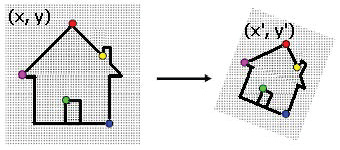

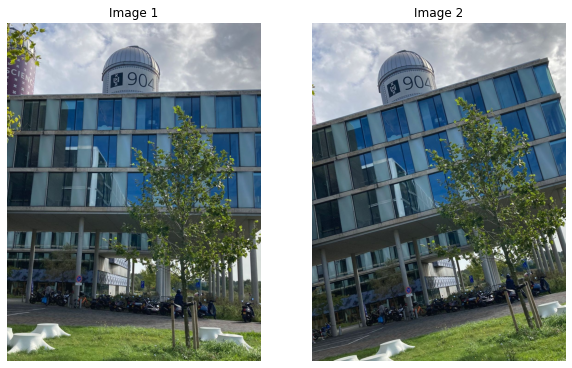

In [25]:
img1_path = "images/sp1.jpg"
img2_path = "images/sp2.jpg"

# Open images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Note: OpenCV uses BGR instead of RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display images
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img1)
ax[0].axis('off')
ax[0].set_title('Image 1')
ax[1].imshow(img2)
ax[1].axis('off')
ax[1].set_title('Image 2')
plt.show()
plt.close()

**Note:** For some patent issue, the newest version of OpenCV does not contain SIFT-related functions. Therefore, the provided environment uses an older version of the pacakge (`opencv-contrib-python==3.4.2.17`). If you can't run the cell below, make sure you are using the `cv1` python environment.

In [26]:
def keypoint_matching(image1, image2):
  """
    Given two input images, find and return the matching keypoints.
    Arguments:
    image1: the first image (in RGB)
    image2: the second image (in RGB)
    Returns:
    The keypoints of image1, the keypoints of image2 and the matching
    keypoints between the two images
  """

  print('\nFinding matching features...')
  # ================
  img1_gray   = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  img2_gray   = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

  # Getting the Interest Pointss
  keypoints_1, desc1 = sift.detectAndCompute(img1_gray, None)
  keypoints_2, desc2 = sift.detectAndCompute(img2_gray, None)

  bf      = cv2.BFMatcher(crossCheck = True)
  matches = bf.match(desc1, desc2)
  # ================

  print("Number of keypoints in image 1:        ", len(keypoints_1))
  print("Number of keypoints in image 2:        ", len(keypoints_2))
  print("Number of keypoints after matching:    ", len(matches), "\n")

  return keypoints_1, keypoints_2, matches



In [27]:
# Find and match key points
keypoints_1, keypoints_2, matches = keypoint_matching(img1,img2)


Finding matching features...
Number of keypoints in image 1:         10664
Number of keypoints in image 2:         11412
Number of keypoints after matching:     7257 



 ### Question 1.2 *(10 pts)*
Take a random subset (with set size set to 10) of all matching points, and plot on the image. Connect matching pairs with lines. You can assign a random color to each line to make them easier to distinguish.

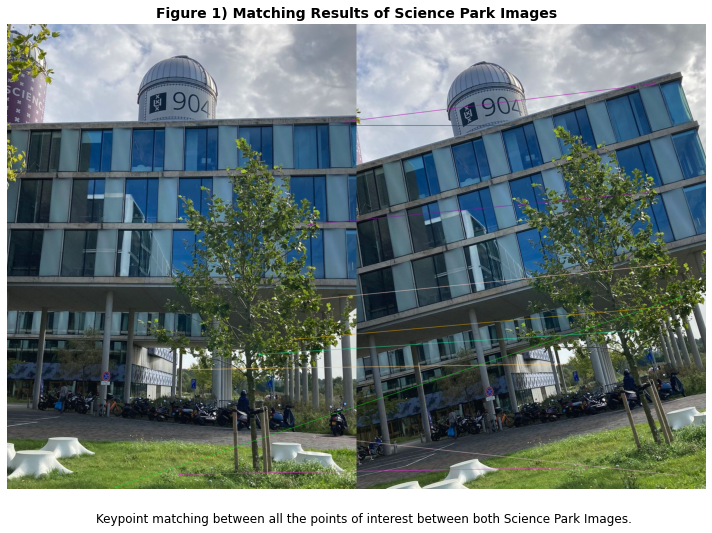

In [28]:
# Extract 10 random matches to plot
random_matches = [matches[i] for i in random.sample(range(0, len(matches)), 10)]

# TODO: Now plot them. Hint: for generating the plot, you can use cv2.drawMatches()
# ================
# Plotting
plt.figure(figsize = (10, 10))
match_plot  = cv2.drawMatches(img1, keypoints_1, 
                              img2, keypoints_2,
                              random_matches, None,
                              flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                              
# The lines cannot be enlarged
plt.imshow(match_plot)

# Styling
text = "Keypoint matching between all the points of interest between both Science Park Images."
plt.axis('off')
plt.title("Figure 1) Matching Results of Science Park Images", fontsize = 14, weight = 'bold')
plt.figtext(0.51, 0.13, text, wrap = True, horizontalalignment = 'center', fontsize = 12)

plt.tight_layout()
plt.show()
# ================

 ### Question 1.3 *(30 pts)*
Create a function that performs the RANSAC algorithm as explained above. The function should return the best transformation found. For visualization, show the transformations from image1 to image2 and from image2 to image1.

In [29]:
# Complete the function below. Use it in the `ransac` function and/or 'visualization' function.
def affine_transform(img, mat, warp='forward'):
    """
    Arguments:
      img: the first/second image (img1 or img2)
      mat: transformation matrix
      warp: forward or inverse warping
    Returns:
      transformed image
    """

    # =========================
    h, w, _ = img.shape
    img_transformed = np.zeros((h, w, img.shape[2]), dtype=np.uint8)

    if warp == 'forward':

        for y in range(h):

            for x in range(w):

                input_coords = np.array([x, y, 1])
                new_xy       = np.floor(mat @ input_coords).astype(int)
                new_x, new_y = new_xy[0], new_xy[1]

                # Check if the new coordinates are within the image boundaries
                if 0 <= new_x < w and 0 <= new_y < h:
                    
                    img_transformed[new_y, new_x, :] = img[y, x, :]


    if warp == 'inverse':

        mat_    = np.concatenate((mat, np.array([0, 0, 1]).reshape(1, -1)), axis=0)
        mat_inv = np.linalg.inv(mat_)[0:2]

        for y in range(h):

            for x in range(w):

                output_coords = np.array([x, y, 1])
                new_xy        = np.floor(mat_inv @ output_coords).astype(int)
                new_x, new_y  = new_xy[0], new_xy[1]

                # Check if the input coordinates are within the image boundaries
                if 0 <= new_x < w and 0 <= new_y < h:

                    img_transformed[y, x, :] = img[new_y, new_x, :]

    # =========================

    return img_transformed

In [43]:
def ransac(kp1, kp2, matches, N):
    """
      Apply RANSAC to filter out the outliers. See the pseudocode provided at
      the beginning of this section for some guidance.
      Arguments:
        kp1: the keypoints of img1
        kp2: the keypoints of img2
        matches: the matching kp1 and kp2
        N: number of iterations
      Returns:
        the best transformation matrix
    """

    # ================
    num_best_inliers = 0
    best_matches     = []
    best_matrix      = np.zeros((3, 3))

    P = 10
    num_matches = len(matches)

    for i in range(N):
        
        print(f"Iteration Number: {i + 1}")
        index = np.random.randint(0, num_matches, P)
        A = []
        b = []

        for j in index:
            # Get the indexes
            match          = matches[j]
            img1_idx       = match.queryIdx  # Index of the keypoint in the first image
            img2_idx       = match.trainIdx  # Index of the keypoint in the second image

            sub_f_image1   = kp1[img1_idx]
            sub_f_image2   = kp2[img2_idx]

            x_img1, y_img1 = sub_f_image1.pt
            x_img2, y_img2 = sub_f_image2.pt

            A.append([x_img1, y_img1, 0, 0, 1, 0])
            A.append([0, 0, x_img1, y_img1, 0, 1])
            b.extend([x_img2, y_img2])

        A   = np.array(A)
        b   = np.array(b)
        b   = b.reshape(-1, 1)
        A_p = np.linalg.pinv(A)

        affine_params = np.dot(A_p, b)
        m1, m2, m3, m4, t1, t2 = affine_params.ravel()
        affine_params = np.array([[m1, m2, t1], [m3, m4, t2]])

        matches_pairs = []
        num_inliers   = 0

        for pair in matches:
            
            x1, y1  = kp1[pair.queryIdx].pt
            x2, y2  = kp2[pair.trainIdx].pt
            homo_x1 = np.array([x1, y1, 1])
            estimate_point2 = affine_params @ homo_x1
            all_p2  = np.array([x2, y2])
            errors  = np.linalg.norm(all_p2 - estimate_point2)

            if errors < 10:
                
                num_inliers += 1
                matches_pairs.append([x1, y1, estimate_point2[0], estimate_point2[1]])

        if num_inliers > num_best_inliers:
            
            num_best_inliers = num_inliers
            best_matrix      = affine_params.copy()
            best_matches     = matches_pairs


    print() # Just for output formatting

    # ================
            
    print("Total number of matches: ", len(matches))
    print("Inliers found:           ", num_best_inliers)
    print("Outliers removed:        ", len(matches) - num_best_inliers)

    return best_matrix, np.array(best_matches)

In [40]:
def visualization(src_img, ref_img, best_matrix):
  """
  Given the source image and the reference image, visualize:
  1. The transformed src image using the forward warping
  2. The transformed src image using the inverse warping
  3. The transformed src image using OpenCV's warpAffine function
  4. The original reference image
  Arguments:
    - src_img: the image to transform
    - ref_img: the referenced image to transform to
    - best_matrix: the best transformation matrix
  """
  # NOTE: if you input a colored image, it expects RGB and not BGR colors.

  # ================
  # Custom Method
  trs_f   = affine_transform(src_img, best_matrix)
  trs_b   = affine_transform(src_img, best_matrix, warp = 'inverse')

  # OpenCVs Method
  r, c, _ = src_img.shape
  trs_cv  = cv2.warpAffine(src_img, best_matrix, (c, r))

  # Plotting
  images  = [trs_f, trs_b, trs_cv, ref_img]
  titles  = ["Forward Warping", "Inverse Warping", "OpenCV's warpAffine", "Original Reference"]
  fig, ax = plt.subplots(1, 4, figsize = (15, 8))
  
  for idx, image in enumerate(images):

    ax[idx].imshow(image)
    ax[idx].axis('off')
    ax[idx].set_title(titles[idx])

  # Styling
  fig.suptitle("Figure 3) Visualization of the RANSAC Transformation Results", fontsize = 14, weight = 'bold')
  plt.figtext(0.51, 0.13, " ", wrap = True, horizontalalignment = 'center', fontsize = 12)

  plt.tight_layout()
  plt.show()
  # ================

Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10

Total number of matches:  7257
Inliers found:            5458
Outliers removed:         1799


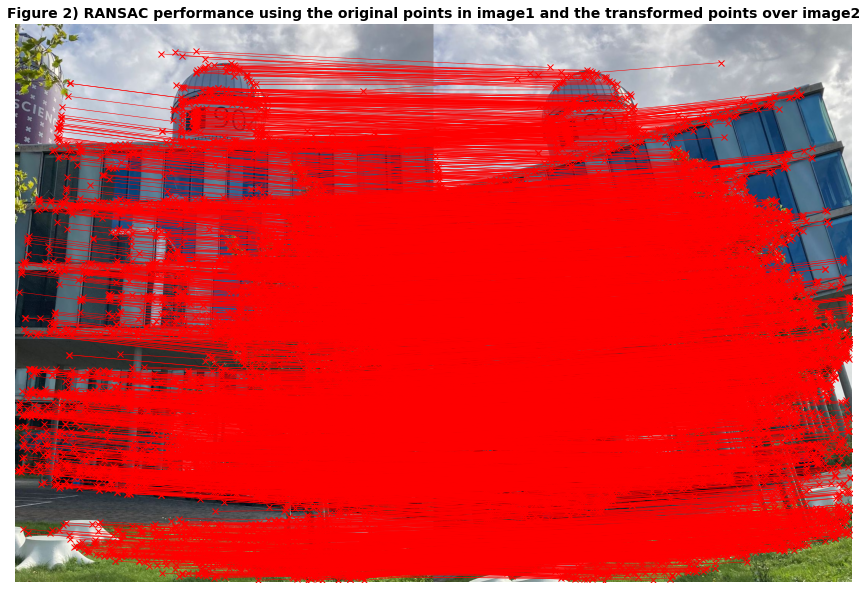

In [47]:
N_iterations = 10 # RANSAC iterations. Experiment with this value!

# TODO: Use the functions defined above to match the keypoints, filter the outliers and
# visualize the results. Show the transformations from image1 to image2 and from image2 to image1.
def plot_matches(matches, total_img):

    match_img = total_img.copy()
    offset    = total_img.shape[1]/2

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_title("Figure 2) RANSAC performance using the original points in image1 and the transformed points over image2", 
                 fontsize = 14, weight = 'bold')
    ax.axis('off')
    ax.set_aspect('equal')

    ax.imshow(np.array(match_img).astype('uint8')) #　RGB has type "integer"
    ax.plot(matches[:, 0], matches[:, 1], 'xr')
    ax.plot(matches[:, 2] + offset, matches[:, 3], 'xr')
    ax.plot([matches[:, 0], matches[:, 2] + offset], [matches[:, 1], matches[:, 3]],
            'r', linewidth=0.5)
    plt.show()
    
best_matrix, matches_pairs = ransac(keypoints_1, keypoints_2, matches, N_iterations)
total_img                  = np.concatenate((img1, img2), axis=1)

plot_matches(matches_pairs, total_img)

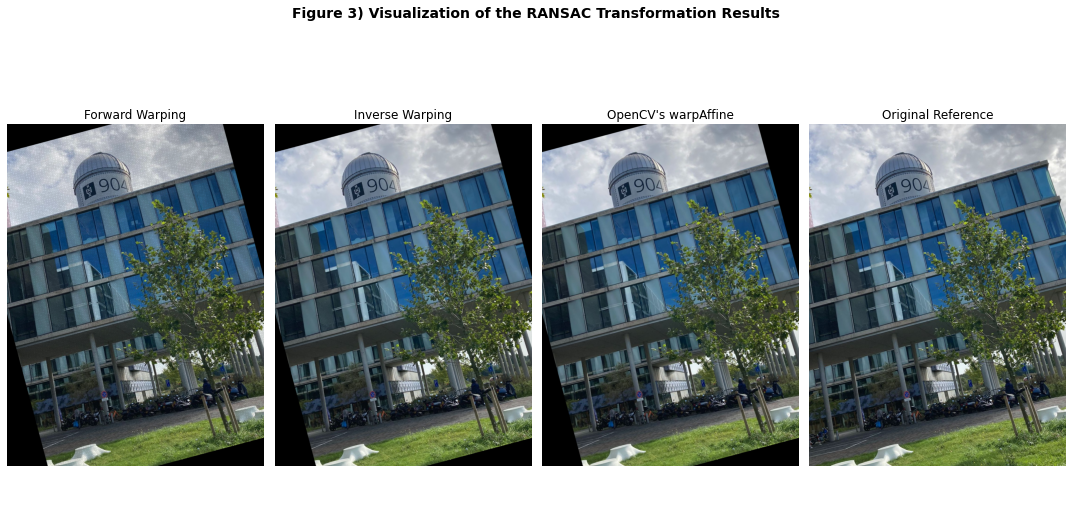

In [11]:
visualization(img1, img2, best_matrix)

 ## Question 2 *(10 pts)*
Based on the results, answer the following questions.

<a name="q2.1"></a>
 ### Question 2.1 *(2 pts)*
How many matches do we need to solve an affine transformation which can be formulated as follows:

$$
\begin{bmatrix}
x'\\y'\end{bmatrix} =
\begin{bmatrix}
m_1 & m_2\\
m_3 & m_4
\end{bmatrix}
\begin{bmatrix}
x\\y\end{bmatrix}+
\begin{bmatrix}
t_1\\t_2\end{bmatrix}
$$

The equation above can be rewritten as:

$$
\begin{bmatrix}
x&y&0&0&1&0\\
0&0&x&y&0&1\end{bmatrix}
\begin{bmatrix}
m_1\\
m_2\\
m_3\\
m_4\\
t_1\\
t_2
\end{bmatrix} =
\begin{bmatrix}
x'\\y'\end{bmatrix}
$$
or, alternatively:
$$
Ax=b, \;
A = \begin{bmatrix}
x&y&0&0&1&0\\
0&0&x&y&0&1\end{bmatrix}, \;
x = \begin{bmatrix}
m_1\\
m_2\\
m_3\\
m_4\\
t_1\\
t_2
\end{bmatrix}, \;
b = \begin{bmatrix}
x'\\y'\end{bmatrix}
$$

**Answer:** In this scenario, we have 6 unknowns. As can be seen from matrix A, every keypoint match will give 2 unknowns. As such we need at least $N/2$ matches to solve the affine transformation, thus meaning that 3 matches are needed. 

 ### Question 2.2 *(4 pts)*
What if we have more matches than the minimum requirement? Will it work in code and why?

**Answer:** Yes, it will still work. Having more matches means you have more equations than unknowns. Algorithms like RANSAC or Least Squares can then be used to compute the most accurate transformation matrix, though the general rule is to take as little samples as possible in order to maximize the likelihood that we have a dataset with no outliers. As such, taking more samples means that on average, more iterations are needed to find the best fit.

 ### Question 2.3 *(4 pts)*
How many iterations are needed to find good transformation parameters? Please explain your answer with the support of a table or figures.

**Answer:** The amount of iterations needed is around 10-15, with this range showing a general plateau relating to the amount of improvement occuring with the number of inliers detected. An insufficient amount of iterations would result in too little inliers found, whereas an amount that is too large would result in no improvement after a certain point. This is supported by the table below showing the results of running the RANSAC algorithm for a set number of times. Specifically, it was attempted for the following number of iterations: [5, 10, 15, 20, 25, 30]. The raw results can be found in the code block below.

_Note_: Due to random index selection, the results can change significantly for each run of the below loop. The general result is not notable=y impacted by this, though. 

| N_Iterations | N_Inliers  | N_Outliers |
|  ---  |  ---  |  ---  |
|   5   | 1702  |  5555 |
|  10   | 5458  |  1799 |
|  15   | 2394  |  4863 |
|  20   | 5458  |  1799 |
|  25   | 5458  |  1799 |
|  30   | 5458  |  1799 |

In [54]:
N_iterations_list = [5, 10, 15, 20, 25, 30]

for N in N_iterations_list:

    print(f"RANSAC using {N} Iterations")
    print("===============================")
    best_matrix, matches_pairs = ransac(keypoints_1, keypoints_2, matches, N)
    total_img                  = np.concatenate((img1, img2), axis=1)
    print("=============================== \n")

RANSAC using 5 Iterations
Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5

Total number of matches:  7257
Inliers found:            1702
Outliers removed:         5555

RANSAC using 10 Iterations
Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10

Total number of matches:  7257
Inliers found:            5458
Outliers removed:         1799

RANSAC using 15 Iterations
Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10
Iteration Number: 11
Iteration Number: 12
Iteration Number: 13
Iteration Number: 14
Iteration Number: 15

Total number of matches:  7257
Inliers found:            2394
Outliers removed:         4863

RANSAC using 20 Iterations
I

____

 # Image Stitching *(40pts)*

In this exercise, you will write a function that takes two images as input and stitches them together. The method described in the previous section will be used to stitch two images together by transforming one of them to the coordinate space of the other. You will work with the supplied images *left.jpg* and *right.jpg*. The overall scheme can be summarized as follows:

1.   As in the previous task you should first find the best transformation between input images.

2.   Then you should estimate the size of the stitched image.

3.   Finally, combine the transformed image with the other one into one image.

**Note:** Only one example output is given (see `images/example result 3 - stitched image.png`). But you are required to do both, *i.e.*, transforming the *left.jpg* to the coordinate space of *right.jpg* and vice versa. Do not cut transformed images but pad the stitched images instead.

 ### Question 3.1 *(35 pts)*
Create a function that takes an image pair as input, and returns the stitched version.

In [65]:
def stitchImages(img1, img2, N=800):
  
  """
  Given two input images, return the stitched image.
  Arguments:
    img1: the first image (in RGB)
    img2: the second image (in RGB)
    N: number of iterations for RANSAC
  Returns:
    The stitched image of the two images
  """
  # TODO: 1. Find the best transformation.

  # TODO: 2. Estimate the size of the stitched image.
  # Hint: Calculate the transformed coordinates of corners of the *right.jpg*

  # TODO: 3. Combine the *left.jpg* with the transformed *right.jpg* into one image.
  # When you call cv2.warpAffine() you have to input the destination size. But it can happen that the new
  # coordinates of a pixel - upon transformation - are negative, e.g. (-10, 0). In that case they  won't show up
  # in the output image. We have to introduce padding, an additional translation to the calculated affine
  # transformation.

  # =================
  # 1) BEST TRANSFORMATION
  kp1, kp2, matches  = keypoint_matching(img1, img2)
  best_ransac_matrix = ransac(kp1, kp2, matches, N)

  # 2) SIZE ESTIMATION
  h1, w1 = img1.shape[:2]
  h2, w2 = img2.shape[:2]

  corners_img2 = np.array([[0, 0], [0, h2], [w2, 0], [w2, h2]])
  
  # apply transformation matrix obtained from RANSAC to the corners
  corners_img2             = corners_img2.astype(np.float64)
  corners_img2_transformed = cv2.perspectiveTransform(corners_img2.reshape(-1, 1, 2), best_ransac_matrix[0])
  print(corners_img2.reshape(-1, 1, 2))

  # rehape back to simpler 2D version
  corners_img2_transformed_2d = corners_img2_transformed.reshape(-1, 2)

  # find the min and max coordinates of the transformed corners
  min_x = min(corners_img2_transformed_2d[:, 0].min(), 0)
  min_y = min(corners_img2_transformed_2d[:, 1].min(), 0)
  max_x = max(corners_img2_transformed_2d[:, 0].max(), w2)
  max_y = max(corners_img2_transformed_2d[:, 1].max(), h2)

  # calculate the dimensions of the stitched image
  stitched_img_size = (int(max_x - min_x), int(max_y - min_y))
  
  # 3) IMAGE COMBINATION
  # translation matrix to adjust any negative coordinates, shifting right and down
  translation_matrix = np.float32([[1, 0, -min_x], [0, 1, -min_y]])
  
  # combine translation and ransac transformation matrix into a final matrix to both align and shift the image
  # print(translation_matrix.shape)
  # print(best_ransac_matrix[0].shape)
  
  # Add a row [0, 0, 1] at the bottom of the 2x3 matrices to convert them into 3x3 matrices
  translation_matrix_homogeneous = np.vstack((translation_matrix, [0, 0, 1]))
  best_ransac_matrix_homogeneous = np.vstack((best_ransac_matrix[0], [0, 0, 1]))
  # Perform matrix multiplication
  final_matrix = np.dot(translation_matrix_homogeneous, best_ransac_matrix_homogeneous)
  final_matrix_affine = final_matrix[:2, :]
  
  #final_matrix = np.dot(translation_matrix, best_ransac_matrix[0])

  transformed_img2 = cv2.warpAffine(img2, final_matrix_affine, (stitched_img_size[0], stitched_img_size[1]))
  
  # create a blank canvas in the dimensions of the stitched image
  stitched_img = np.zeros((stitched_img_size[1], stitched_img_size[0], 3))
  print(stitched_img.shape)

  # place img1 onto the canvas where is was originally and shift by -min_x and -min_y
  stitched_img[-int(min_y):h1 - int(min_y), -int(min_x):w1 - int(min_x)] = img1

  # wherever img2 is black (values of 0), use the pixels from img1 instead
  for i in range(stitched_img_size[1]):
      
      for j in range(stitched_img_size[0]):
          
          if np.all(transformed_img2[i, j] == 0):
              
              stitched_img[i, j] = stitched_img[i, j]

          else:
              
              stitched_img[i, j] = transformed_img2[i, j]

  # =================


  return stitched_img

In [66]:
img1_path = "images/left.jpg"
img2_path = "images/right.jpg"

# Load images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Note: OpenCV uses BGR instead of RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Stitch the images
stitchedImage1 = stitchImages(img1, img2, 100)
stitchedImage2 = stitchImages(img2, img1, 100)

# Plotting
plt.imshow(stitchedImage1)
plt.axis('off')
plt.show()
plt.close()


Finding matching features...
Number of keypoints in image 1:         1217
Number of keypoints in image 2:         1494
Number of keypoints after matching:     837 

Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10
Iteration Number: 11
Iteration Number: 12
Iteration Number: 13
Iteration Number: 14
Iteration Number: 15
Iteration Number: 16
Iteration Number: 17
Iteration Number: 18
Iteration Number: 19
Iteration Number: 20
Iteration Number: 21
Iteration Number: 22
Iteration Number: 23
Iteration Number: 24
Iteration Number: 25
Iteration Number: 26
Iteration Number: 27
Iteration Number: 28
Iteration Number: 29
Iteration Number: 30
Iteration Number: 31
Iteration Number: 32
Iteration Number: 33
Iteration Number: 34
Iteration Number: 35
Iteration Number: 36
Iteration Number: 37
Iteration Number: 38
Iteration Number: 39
Iteration Number: 40
Ite

MemoryError: Unable to allocate 11.5 GiB for an array with shape (125452, 4096, 3) and data type float64

 ### Question 3.2 *(5 pts)*
Visualize the stitched image alongside with the original image pair.

In [ ]:
# TODO: Visualize the stitched images and the original images.

# ================
# OUR CODE HERE
# ================
raise NotImplementedError

 # Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

Name: Despoina Touska

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name: Ekin Fergan

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name: Gregory Hok Tjoan Go

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name: Jesse Wiers

Contribution on research: \
Contribution on programming: \
Contribution on writing:

 # -End of Notebook-